In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
columns = ['Label'] + ['feature {}'.format(x) for x in range(1, 14)]
data = pd.read_csv('data/wine.csv', names=columns)
y = data['Label'].to_numpy()
X = data.drop(['Label'], axis=1).to_numpy()

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [7]:
kfold = KFold(shuffle=True, random_state=42, n_splits=5)

In [24]:
def train(X, y, k):
    kfold = KFold(shuffle=True, random_state=42, n_splits=5)
    score = []
    for train_idx, test_idx in kfold.split(X):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        acc_score = accuracy_score(y_test, knn.predict(X_test))
        score.append(acc_score)
    return sum(score) / 5    

In [48]:
scores = []
for i in range(1, 51):
    scores.append(train(X, y, i))
print('Best result: {}\nk = {}'.format(max(scores), scores.index(max(scores)) + 1))

Best result: 0.7304761904761905
k = 1


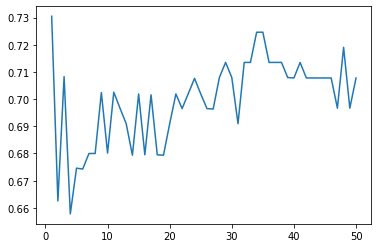

In [49]:
sns.lineplot(list(range(1, 51)), scores)

In [40]:
from sklearn.preprocessing import scale

In [41]:
X_scaled = scale(X)

In [46]:
scores = []
for i in range(1, 51):
    scores.append(train(X_scaled, y, i))
print('Best result: {}\nk = {}'.format(max(scores), scores.index(max(scores)) + 1))

Best result: 0.9776190476190475
k = 29


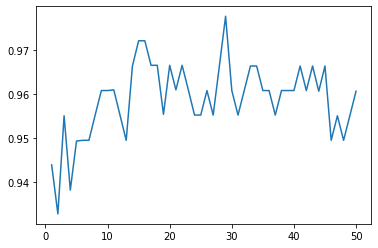

In [47]:
sns.lineplot(list(range(1, 51)), scores)